Contributors: Bhairav Valera, Michael Wood-Vasey (owner of tutorial code)

In [14]:
import os
import numpy as np
import random
import lsst.daf.persistence as dafPersist
import lsst.afw.geom as afwGeom
import lsst.afw.coord as afwCoord
import lsst.afw.image as afwImage
import lsst.afw.display as afwDisplay

from astropy.table import Table
from astropy.visualization import ZScaleInterval

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 6)
zscale = ZScaleInterval()

In [16]:
def cutout_coadd_ra_dec(butler, ra, dec, filter='r', datasetType='deepCoadd', **kwargs):
    radec = afwGeom.SpherePoint(ra, dec, afwGeom.degrees)
    return cutout_coadd_spherepoint(butler, radec, filter=filter, datasetType=datasetType)

def cutout_coadd_spherepoint(butler, radec, filter='r', datasetType='deepCoadd',
                             skymap=None, cutoutSideLength=200, **kwargs):
    cutoutSize = afwGeom.ExtentI(cutoutSideLength, cutoutSideLength)
    if skymap is None:
        skymap = butler.get("%s_skyMap" % datasetType)
     # Look up the tract, patch for the RA, Dec
    tractInfo = skymap.findTract(radec)
    patchInfo = tractInfo.findPatch(radec)
    xy = afwGeom.PointI(tractInfo.getWcs().skyToPixel(radec))
    bbox = afwGeom.BoxI(xy - cutoutSize//2, cutoutSize)
    coaddId = {'tract': tractInfo.getId(), 'patch': "%d,%d" % patchInfo.getIndex(), 'filter': filter}
    cutout_image = butler.get(datasetType+'_sub', bbox=bbox, immediate=True, dataId=coaddId)
    return cutout_image

In [17]:
def make_cutout_image(butler, ra, dec, filter='r', vmin=None, vmax=None, label=None,
                      show=True, saveplot=False, savefits=False,
                      datasetType='deepCoadd'):
    cutout_image = cutout_coadd_ra_dec(butler, ra, dec, filter=filter, datasetType='deepCoadd')
    if savefits:
        if isinstance(savefits, str):
            filename = savefits
        else:
            filename = 'postage-stamp.fits'
        cutout_image.writeFits(filename)
    
    radec = afwGeom.SpherePoint(ra, dec, afwGeom.degrees)
    xy = cutout_image.getWcs().skyToPixel(radec)
    
    if vmin is None or vmax is None:
        vmin, vmax = zscale.get_limits(cutout_image.image.array)

    plt.imshow(cutout_image.image.array, vmin=vmin, vmax=vmax, cmap='binary_r', origin='lower')
    plt.colorbar()
    plt.scatter(xy.getX() - cutout_image.getX0(), xy.getY() - cutout_image.getY0(),
                color='none', edgecolor='red', marker='o', s=200)
    if label is not None:
        plt.title(label)
    if saveplot:
        if isinstance(saveplot, str):
            filename = saveplot
        else:
            filename = 'postage-stamp.png'
        plt.savefig(filename)
    if show:
        plt.show()

    return cutout_image

In [18]:
%store -r bright_objects_filtered_idx01
%store -r bright_objects_filtered_ra01
%store -r bright_objects_filtered_dec01

%store -r mid_objects_filtered_idx01
%store -r mid_objects_filtered_ra01
%store -r mid_objects_filtered_dec01

%store -r dim_objects_filtered_idx01
%store -r dim_objects_filtered_ra01
%store -r dim_objects_filtered_dec01

%store -r bright_objects_filtered_idx11
%store -r bright_objects_filtered_ra11
%store -r bright_objects_filtered_dec11

In [19]:
bright_objects_filtered_idx01 = np.array(bright_objects_filtered_idx01).tolist()
bright_objects_filtered_ra01 = np.array(bright_objects_filtered_ra01).tolist()
bright_objects_filtered_dec01 = np.array(bright_objects_filtered_dec01).tolist()

mid_objects_filtered_idx01 = np.array(mid_objects_filtered_idx01).tolist()
mid_objects_filtered_ra01 = np.array(mid_objects_filtered_ra01).tolist()
mid_objects_filtered_dec01 = np.array(mid_objects_filtered_dec01).tolist()

dim_objects_filtered_idx01 = np.array(dim_objects_filtered_idx01).tolist()
dim_objects_filtered_ra01 = np.array(dim_objects_filtered_ra01).tolist()
dim_objects_filtered_dec01 = np.array(dim_objects_filtered_dec01).tolist()

bright_objects_filtered_idx11 = np.array(bright_objects_filtered_idx11).tolist()
bright_objects_filtered_ra11 = np.array(bright_objects_filtered_ra11).tolist()
bright_objects_filtered_dec11 = np.array(bright_objects_filtered_dec11).tolist()

In [20]:
repo = '/global/projecta/projectdirs/lsst/global/in2p3/Run1.1/output'
butler = dafPersist.Butler(repo)

In [29]:
bright_objects_table01 = Table([bright_objects_filtered_idx01,
                              bright_objects_filtered_ra01,
                              bright_objects_filtered_dec01], names=('ID', 'RA', 'DEC'), 
                              meta={'name' : 'bright_objects_table01'})

mid_objects_table01 = Table([mid_objects_filtered_idx01,
                              mid_objects_filtered_ra01,
                              mid_objects_filtered_dec01], names=('ID', 'RA', 'DEC'), 
                              meta={'name' : 'bright_objects_table01'})

dim_objects_table01 = Table([dim_objects_filtered_idx01,
                              dim_objects_filtered_ra01,
                              dim_objects_filtered_dec01], names=('ID', 'RA', 'DEC'), 
                              meta={'name' : 'bright_objects_table01'})

bright_objects_table11 = Table([bright_objects_filtered_idx11,
                              bright_objects_filtered_ra11,
                              bright_objects_filtered_dec11], names=('ID', 'RA', 'DEC'), 
                              meta={'name' : 'bright_objects_table11'})

print(bright_objects_table01)
print(mid_objects_table01)
print(dim_objects_table01)

   ID         RA           DEC      
------- ------------- --------------
1088655 54.4383166191 -31.1298833316
2145918 57.9184954941 -30.1313293125
2277505 57.4602505509  -30.830219855
2277506 57.4596961063 -30.8323130295
2533493  52.831392662 -28.6296455411
4575148 57.3845422834 -28.5006819493
   ID         RA           DEC      
------- ------------- --------------
  43842 54.5573255943 -31.2753831028
  43846 54.5586859936 -31.2769910413
  43847 54.5555615075 -31.2744319562
  43855 54.5582062739 -31.2758519692
  44618  54.630508097 -31.2541974292
 125631 56.3694505287 -31.4581573051
 134456 56.1950288325 -31.2586032133
 149949 55.9582990453 -31.5437914553
 149988 55.9578674774 -31.5325987173
 150006 55.9543897427 -31.5345899729
    ...           ...            ...
6768292 57.7610529854 -27.3327645808
6770503 57.7880328774 -27.2935176016
6775903  57.513385729 -28.2598608307
6777527 57.4195744597 -28.2091805592
6777533 57.4226280932 -28.2094319114
6788906 57.4213440861 -28.1037921566
6

In [30]:
subfolder = 'Stamps'
if not os.path.exists(subfolder):
    os.mkdir(subfolder)

In [31]:
"""random_bright_table11 = Table([[0], [float(0)], [float(0)]], names=('ID', 'RA', 'DEC'), 
                              meta={'name' : 'bright_objects_table01'})
count = 0
while count < 5:
    row = random.choice(bright_objects_table11)
    random_bright_table11.add_row(row)
    count+=1
random_bright_table11.remove_row(0)
print(random_bright_table11)"""

"random_bright_table11 = Table([[0], [float(0)], [float(0)]], names=('ID', 'RA', 'DEC'), \n                              meta={'name' : 'bright_objects_table01'})\ncount = 0\nwhile count < 5:\n    row = random.choice(bright_objects_table11)\n    random_bright_table11.add_row(row)\n    count+=1\nrandom_bright_table11.remove_row(0)\nprint(random_bright_table11)"

In [32]:
mid_objects_table01_cut = Table([[0], [float(0)], [float(0)]], names=('ID', 'RA', 'DEC'), 
                              meta={'name' : 'bright_objects_table01'})
dim_objects_table01_cut = Table([[0], [float(0)], [float(0)]], names=('ID', 'RA', 'DEC'), 
                              meta={'name' : 'bright_objects_table01'})

midCount = 0
dimCount = 0
while midCount < 10:
    row = random.choice(mid_objects_table01)
    mid_objects_table01_cut.add_row(row)
    midCount+=1
while dimCount < 10:
    row = random.choice(dim_objects_table01)
    dim_objects_table01_cut.add_row(row)
    dimCount+=1
mid_objects_table01_cut.remove_row(0)
dim_objects_table01_cut.remove_row(0)
print(mid_objects_table01_cut)
print(dim_objects_table01_cut)

   ID         RA           DEC      
------- ------------- --------------
6740028 57.6353772607 -28.0001894505
5821077 54.8262063454 -27.1245726996
4366479 57.4444000928 -29.6665016048
2194202 57.7605566301 -30.4918799525
3988431 55.0706330487 -29.5302371016
5144349 53.5339191466 -28.1612202171
2581921 52.5137949714 -29.2277144151
3223389 53.5676865135 -29.7419677584
1313010 54.0570794066 -30.6025649614
2613252 52.5109739211 -28.4565552634
   ID         RA           DEC      
------- ------------- --------------
2584281 52.4370213249 -29.0628415292
1134895 54.4877315603 -30.4710283475
3958304 55.4104799411 -28.4830474342
2257522 57.7410043553 -29.8377855431
4682314 57.0755770485 -28.5141084888
5708804 55.0804096782  -27.695989845
3421292 53.3618286463 -28.5957245839
2584320 52.4364819333  -29.059142705
4163958 54.9595776263 -28.5095448712
5905344  54.290232253 -28.2410538131


In [25]:
"""frame = 5
vmin, vmax = -1.5, +5.5
filter = 'i'
show = True
saveplot = False
datasetType = 'deepCoadd'

for objectId, ra, dec in save_table:
    plt.figure(frame)
    plt.clf()
    basename = "Stamps/%s_%s_%s" % (datasetType, objectId, filter)
    saveplot = "%s.png" % basename
    cutout = make_cutout_image(butler, ra, dec, filter=filter, vmin=vmin, vmax=vmax,
                      label="Object ID: %d" % objectId,
                      show=show, saveplot=saveplot)"""

'frame = 5\nvmin, vmax = -1.5, +5.5\nfilter = \'i\'\nshow = True\nsaveplot = False\ndatasetType = \'deepCoadd\'\n\nfor objectId, ra, dec in save_table:\n    plt.figure(frame)\n    plt.clf()\n    basename = "Stamps/%s_%s_%s" % (datasetType, objectId, filter)\n    saveplot = "%s.png" % basename\n    cutout = make_cutout_image(butler, ra, dec, filter=filter, vmin=vmin, vmax=vmax,\n                      label="Object ID: %d" % objectId,\n                      show=show, saveplot=saveplot)'

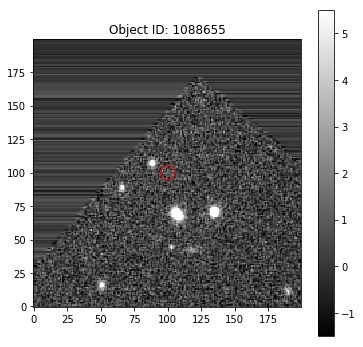

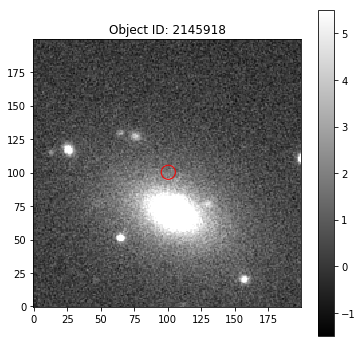

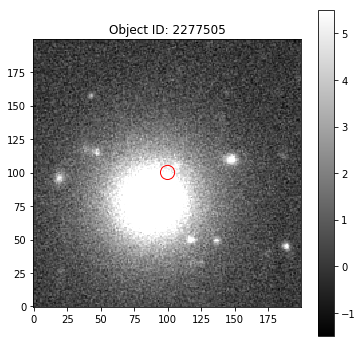

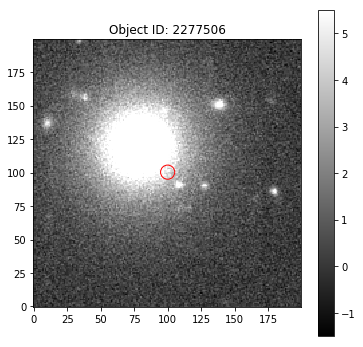

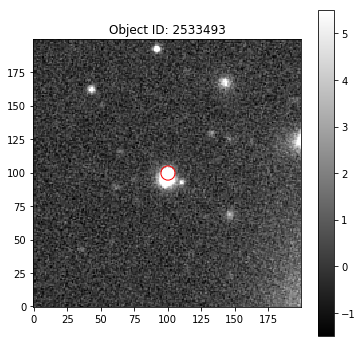

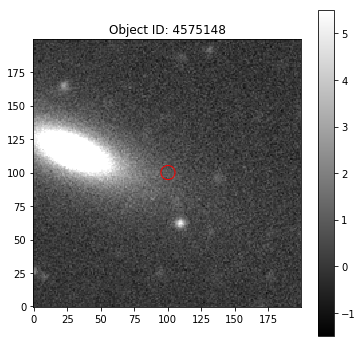

In [26]:
frame = 1
vmin, vmax = -1.5, +5.5
filter = 'i'
show = True
saveplot = False
datasetType = 'deepCoadd'

for objectId, ra, dec in bright_objects_table01:
    plt.figure(frame)
    plt.clf()
    basename = "Stamps/%s_%s_%s" % (datasetType, objectId, filter)
    saveplot = "%s.png" % basename
    cutout = make_cutout_image(butler, ra, dec, filter=filter, vmin=vmin, vmax=vmax,
                      label="Object ID: %d" % objectId,
                      show=show, saveplot=saveplot)

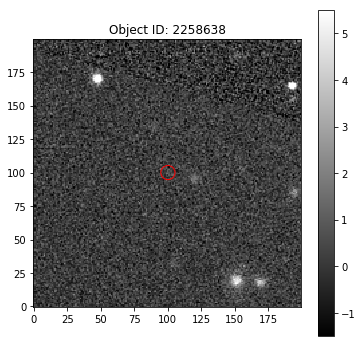

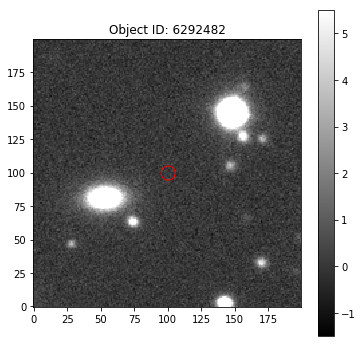

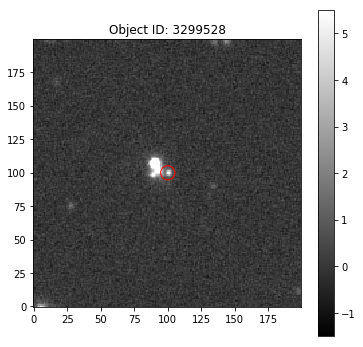

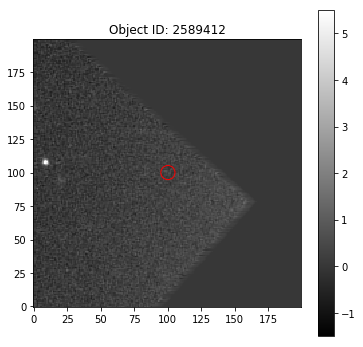

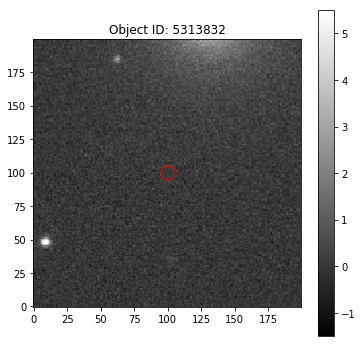

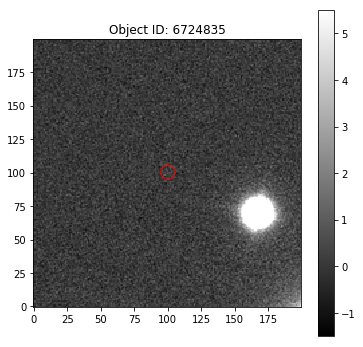

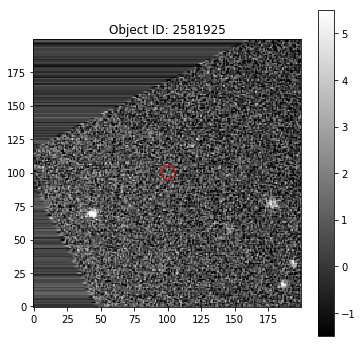

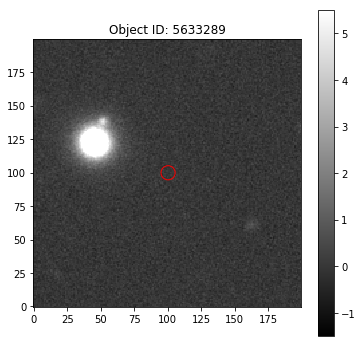

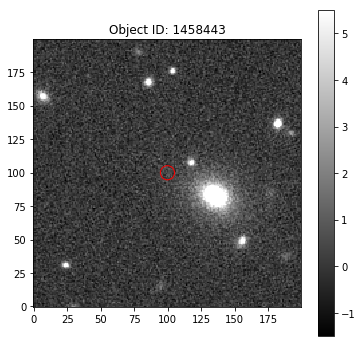

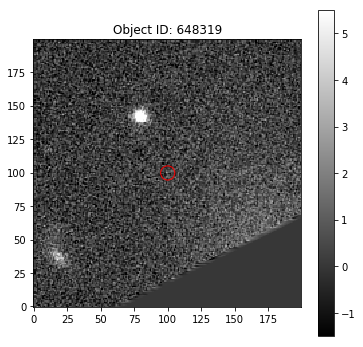

In [27]:
frame = 1
vmin, vmax = -1.5, +5.5
filter = 'i'
show = True
saveplot = False
datasetType = 'deepCoadd'

for objectId, ra, dec in mid_objects_table01_cut:
    plt.figure(frame)
    plt.clf()
    basename = "Stamps/%s_%s_%s" % (datasetType, objectId, filter)
    saveplot = "%s.png" % basename
    cutout = make_cutout_image(butler, ra, dec, filter=filter, vmin=vmin, vmax=vmax,
                      label="Object ID: %d" % objectId,
                      show=show, saveplot=saveplot)

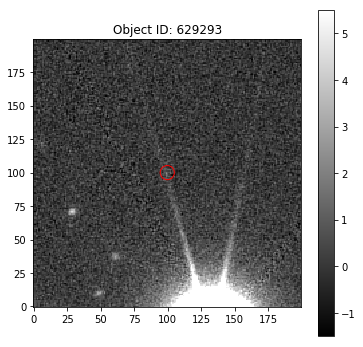

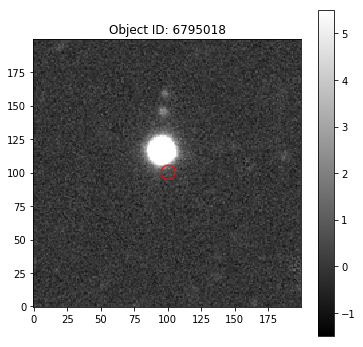

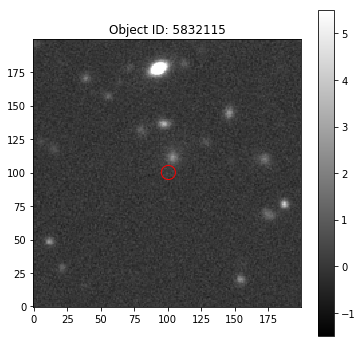

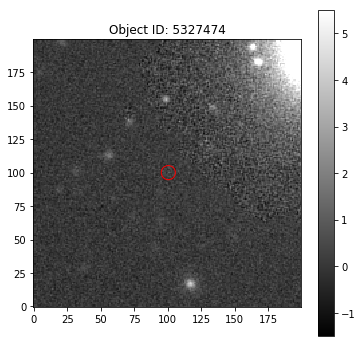

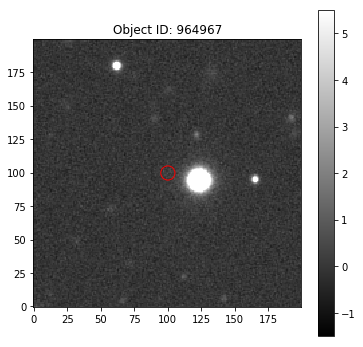

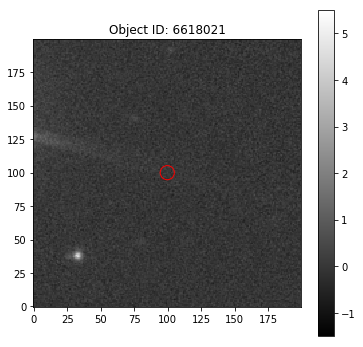

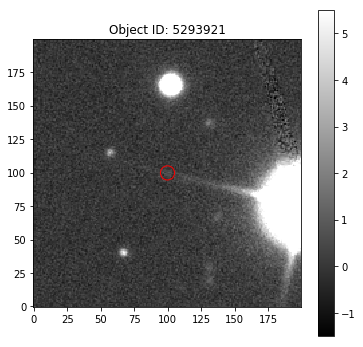

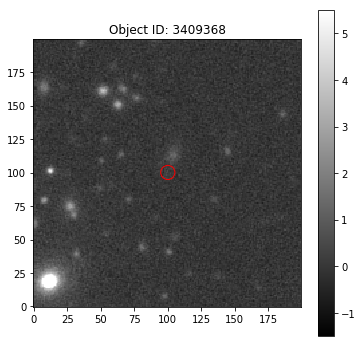

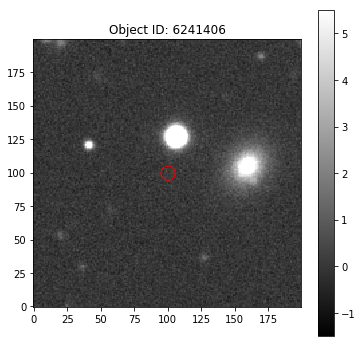

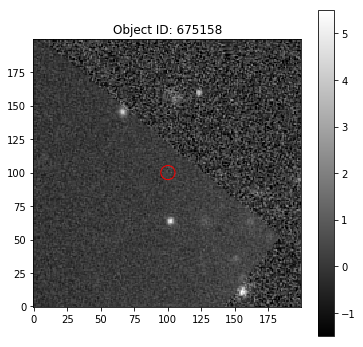

In [28]:
frame = 1
vmin, vmax = -1.5, +5.5
filter = 'i'
show = True
saveplot = False
datasetType = 'deepCoadd'

for objectId, ra, dec in dim_objects_table01_cut:
    plt.figure(frame)
    plt.clf()
    basename = "Stamps/%s_%s_%s" % (datasetType, objectId, filter)
    saveplot = "%s.png" % basename
    cutout = make_cutout_image(butler, ra, dec, filter=filter, vmin=vmin, vmax=vmax,
                      label="Object ID: %d" % objectId,
                      show=show, saveplot=saveplot)